## Yacine Mahdid June 13 2020
The goal of this notebook is to generate all the visualization we need in order to design our poster for OHBM. We need a few and they are outline over [here in the github issue](https://github.com/BIAPT/Envelope-and-phase-based-measures-of-functional-connectivity-consciousness-classification/issues/5)

In [1]:
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from utils import load_pickle

IN_DIR = "/home/yacine/Documents/BIAPT/testing/"
OUT_DIR = f"/home/yacine/Documents/BIAPT/aec_vs_pli_result/"

EPOCHS = ["emf5" "eml5"]
GRAPHS = ["aec" "pli"]
FEATURES = ["func" "wei" "bin" "func-wei" "func-bin"]

def save_figure(fig_name, dpi=500):
    """ Helper to save the figure with the right fig_name and the right dpi"""
    fig = plt.gcf()
    plt.show()
    fig.set_size_inches((8, 8), forward=False)
    fig.savefig(fig_name, dpi=dpi)

emf5 Deep  BIN:  0.49559614913667455  WEI: 0.6522511904650972
eml5 Light  BIN:  0.533778644233705  WEI: 0.6166124503044291


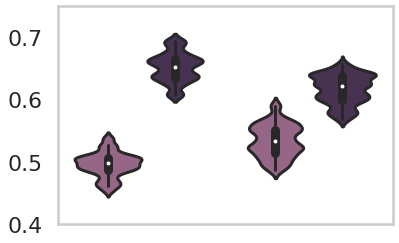

emf5 Deep  BIN:  0.5673887387771649  WEI: 0.6040918738974924
eml5 Light  BIN:  0.5245138671732442  WEI: 0.6343444124767224


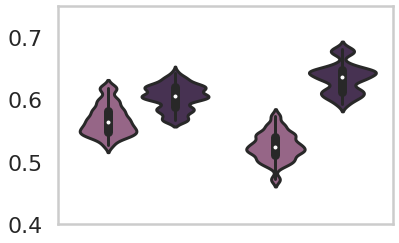

In [86]:
# We want to make the violin plot of the distribution between the binary and weighted graph for aec and pli

dark_purple = (0.28645868165429034, 0.17570375961380752, 0.3440754090644915) # used for weighted
light_purple = (0.6196337473419887, 0.3684648209452393, 0.5405540573846532) # used for binary
beige = (0.8454263141680334, 0.6225806657605325, 0.6651572981499156) # used for functional connectivity only

for graph in ['aec', 'pli']:
    data = {
        'Accuracy': [],
        'Graph Type': [],
        'Condition': []
    }
    for epoch, cur_condition in zip(['emf5','eml5'], ['Deep','Light']):
        bin_bootstrap = load_pickle(f"{IN_DIR}/bootstrap_{graph}_{epoch}_bin.pickle")
        wei_bootstrap = load_pickle(f"{IN_DIR}/bootstrap_{graph}_{epoch}_wei.pickle")

        # I need to first take the data and put it in a dataframe
        bin_label = ['binarized' for x in bin_bootstrap['distribution']]
        wei_label = ['weighted' for x in wei_bootstrap['distribution']]
        condition = [cur_condition for x in wei_bootstrap['distribution']]*2

        data['Accuracy'] = data['Accuracy'] + bin_bootstrap['distribution'] + wei_bootstrap['distribution']
        data['Graph Type'] = data['Graph Type'] + bin_label + wei_label
        data['Condition'] = data['Condition'] + condition
        
        print(epoch, cur_condition, " BIN: ", str(np.mean(bin_bootstrap['distribution'])), " WEI:", str(np.mean(wei_bootstrap['distribution'])))

    colors = [light_purple, dark_purple]# Set your custom color palette
    sns.set_context("poster")
    sns.set_palette(sns.color_palette(colors))
    sns.set_style("whitegrid",{'axes.grid' : False})
    df = pd.DataFrame (data, columns = ['Accuracy','Graph Type', "Condition"])
    ax = sns.violinplot(data=df, x='Condition', y='Accuracy', hue="Graph Type")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set(xticklabels=[])
    ax.legend_.remove()
    ax.set_ylim(0.40, 0.75)
    
    save_figure(f"{OUT_DIR}{graph}_bin_vs_wei.png")


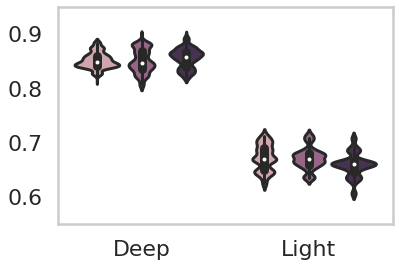

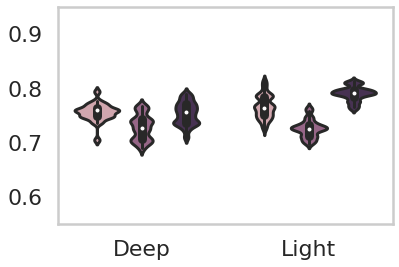

In [11]:
# Generate the violin plot for all func bootstrap
# TODO: I'm missing func-bin
for graph in ['aec', 'pli']:
    data = {
        'Accuracy': [],
        'Graph Type': [],
        'Condition': []
    }
    
    for epoch, cur_condition in zip(['emf5','eml5'], ['Deep','Light']):
        func_bootstrap = load_pickle(f"{IN_DIR}bootstrap_{graph}_{epoch}_func.pickle")
        bin_bootstrap = load_pickle(f"{IN_DIR}bootstrap_{graph}_{epoch}_func-bin.pickle")
        wei_bootstrap = load_pickle(f"{IN_DIR}bootstrap_{graph}_{epoch}_func-wei.pickle")

        # I need to first take the data and put it in a dataframe
        func_label = ['func' for x in func_bootstrap['distribution']]
        bin_label = ['func + bin' for x in bin_bootstrap['distribution']]
        wei_label = ['func + wei' for x in wei_bootstrap['distribution']]
        condition = [cur_condition for x in wei_bootstrap['distribution']]*3

        data['Accuracy'] = data['Accuracy'] + func_bootstrap['distribution'] + bin_bootstrap['distribution'] + wei_bootstrap['distribution']
        data['Graph Type'] = data['Graph Type'] + func_label + bin_label + wei_label
        data['Condition'] = data['Condition'] + condition

    colors = [beige, light_purple, dark_purple]# Set your custom color palette
    sns.set_context("poster")
    sns.set_palette(sns.color_palette(colors))
    sns.set_style("whitegrid",{'axes.grid' : False})
    df = pd.DataFrame (data, columns = ['Accuracy','Graph Type', "Condition"])
    ax = sns.violinplot(data=df, x='Condition', y='Accuracy', hue="Graph Type")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend_.remove()
    ax.set_ylim(0.55, 0.95)
    save_figure(f"{OUT_DIR}{graph}_func_vs_bin_vs_wei.png")

emf5 aec func:  0.8581032400383503  WEI: 0.8562630560199485
emf5 pli func:  0.7891418083311031  WEI: 0.7901247331085686
eml5 aec func:  0.6873096412580897  WEI: 0.6798217638888326
eml5 pli func:  0.7772449792838181  WEI: 0.8085116542079901


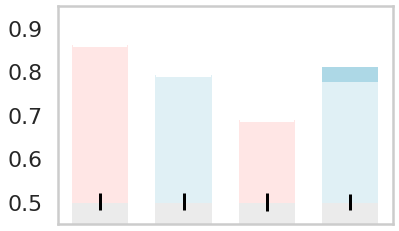

Random:
[0.5006588125317554, 0.5006815448770335, 0.5002578938418497, 0.5000886024214355]
Accuracies
[0.6434782608695652, 0.8695652173913043, 0.6086956521739131, 0.8938053097345132, 0.6724137931034483, 0.9504950495049505, 0.8793103448275862, 0.5981308411214953, 0.8793103448275862]
[0.7043478260869566, 0.8869565217391304, 0.6347826086956522, 0.911504424778761, 0.7931034482758621, 0.9603960396039604, 0.8620689655172413, 0.6355140186915887, 0.8879310344827587]
0.019306917494598366


In [87]:
# Make the stacked bar plot for the deep and ligh for random with and without func-wei (three way stacked)
# Will do it for deep and aec

# Colors
random_color = "#ebebeb"
aec_color = "#ffe6e5"
aec_improvement_color = "#ffcccb"
pli_color = "#e0f0f5"
pli_improvement_color = "#add8e6"

random_acc = []
func_acc = []
wei_acc = []
y_err = []
for epoch in ['emf5', 'eml5']:
    for graph in ['aec', 'pli']:
        permutations = load_pickle(f"{IN_DIR}permutation_{graph}_{epoch}_func.pickle")
        func_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func.pickle")
        wei_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func-wei.pickle")
        
        # Next up we will do a comparison plot of each permutation tests iteration
        random_acc = random_acc + [np.mean(permutations)]
        func_acc = func_acc + [np.mean(func_clf['accuracies']) - np.mean(permutations)]
        wei_acc = wei_acc + [np.mean(wei_clf['accuracies']) - (np.mean(func_clf['accuracies']))]

        y_err = y_err + [np.std(permutations)]
        
        print(epoch, graph, "func: ", str(np.mean(func_clf['accuracies'])), " WEI:", str(np.mean(wei_clf['accuracies'])))

        
ind = np.arange(4)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

sum_list = []
for (func, rand) in zip(func_acc, random_acc):
    sum_list.append(func+rand)
    
fix_wei_acc = []
for wei in wei_acc:
    
    if wei < 0:
        wei = 0
    fix_wei_acc.append(wei)

p1 = plt.bar(ind, random_acc, width, yerr=y_err)
p2 = plt.bar(ind, func_acc, width, bottom=random_acc)
p3 = plt.bar(ind, fix_wei_acc, width, bottom=sum_list)




#plt.xticks(ind, ('Healthy', 'MSK', 'Both'))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylim((0.45, 0.95))
plt.xticks([])


# Setting up the colors
[p1[i].set_color(random_color) for i in range(4)]
p2[0].set_color(aec_color)
p2[1].set_color(pli_color)
p2[2].set_color(aec_color)
p2[3].set_color(pli_color)


p3[3].set_color(pli_improvement_color)

save_figure(f"{OUT_DIR}improvement_by_wei.png")

print("Random:")
print(random_acc)
print("Accuracies")
print(func_clf['accuracies'])
print(wei_clf['accuracies'])
print(np.std(permutations))

[0.017391304347826098, 0.04347826086956519, -0.060869565217391286, 0.0, 0.025862068965517238, 0.01980198019801982, -0.017241379310344862, -0.036363636363636376, -0.008620689655172487]
[0.06956521739130428, 0.0, 0.05217391304347829, -0.053097345132743334, 0.051724137931034475, 0.02970297029702973, -0.0431034482758621, -0.0636363636363636, -0.034482758620689724]
[-0.05217391304347824, -0.008695652173912993, 0.043478260869565244, 0.008849557522123908, 0.008620689655172376, 0.03960396039603964, -0.008620689655172376, -0.04672897196261683, -0.051724137931034475]
[0.0608695652173914, 0.017391304347826098, 0.02608695652173909, 0.017699115044247815, 0.12068965517241381, 0.00990099009900991, -0.017241379310344862, 0.03738317757009346, 0.008620689655172487]
emf5+aec emf5+pli eml5+aec eml5+pli


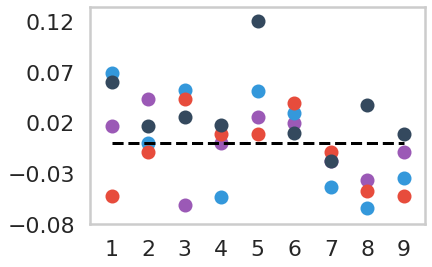

In [85]:
# In this one we want to reproduce the accuracy improvement for each participant given by weighted features
flatui = ["#9b59b6", "#3498db",  "#e74c3c", "#34495e"]
wei_improvements = []
index = 0
for epoch in ['emf5', 'eml5']:
    for graph in ['aec', 'pli']:
        wei_improvement = []
        func_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func.pickle")
        wei_clf = load_pickle(f"{IN_DIR}best_clf_{graph}_{epoch}_func-wei.pickle")
        
        for func, wei in zip(func_clf['accuracies'], wei_clf['accuracies']):
            wei_improvement.append(wei-func)
        
        print(wei_improvement)
        print("======")
        plt.scatter([1,2,3,4,5,6,7,8,9], wei_improvement, color=flatui[index])
        index = index + 1
        wei_improvements.append(wei_improvement)

plt.plot([1,2,3,4,5,6,7,8,9], [0,0,0,0,0,0,0,0,0], 'k--')
plt.yticks(np.arange(-0.08, 0.15, 0.05))
plt.xticks(np.arange(1,10,1))
print("emf5+aec", "emf5+pli", "eml5+aec", "eml5+pli")
save_figure(f"{OUT_DIR}participant_improvement_by_wei.png")

(0.9943406382160708, 0.9035447904652056, 0.8906881968473664)
(0.9904190695886198, 0.8315109573241061, 0.8162706651287966)
(0.9869434832756633, 0.7480046136101499, 0.745836216839677)
(0.981038062283737, 0.6358016147635525, 0.7133564013840831)
(0.9728719723183391, 0.48565936178392927, 0.6596693579392541)
(0.931841599384852, 0.3342714340638216, 0.6172241445597847)
(0.8514878892733564, 0.18745098039215685, 0.5840830449826989)
(0.7127104959630911, 0.03686274509803919, 0.5102652825836217)
(0.5687966166858901, 0.00392156862745098, 0.4788312187620146)
(0.4249288735101884, 0.002829680891964629, 0.4524721261053441)


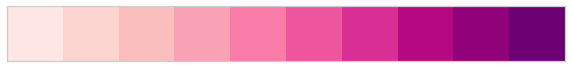

In [67]:
sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)

for color in sequential_colors:
    print(color)

[0.9312692223325372, 0.8201921796082118, 0.7971480974663592]
[0.893122085710277, 0.7206100946592334, 0.72229576813508]
[0.8454263141680334, 0.6225806657605325, 0.6651572981499156]
[0.7840440880599453, 0.5292660544265891, 0.6200568926941761]
[0.7070159397024951, 0.4429345424186431, 0.5801722574606395]
[0.6196337473419887, 0.3684648209452393, 0.5405540573846532]
[0.5151069036855755, 0.29801047535056074, 0.49050619139300705]
[0.402075529973261, 0.23451699199015608, 0.4263168000834109]
[0.28645868165429034, 0.17570375961380752, 0.3440754090644915]
[0.1750865648952205, 0.11840023306916837, 0.24215989137836502]


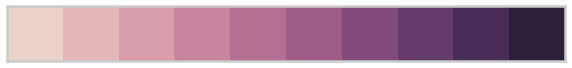

In [115]:
sns.palplot(sns.cubehelix_palette(10))
for color in sns.cubehelix_palette(10):
    print(color)